In [1]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
print('Метки классов: ', np.unique(y))

Метки классов:  [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size= 0.3, random_state=1, stratify = y
)
#stratify сохраняет балланс классов

In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [5]:
y_pred = ppn.predict(X_test_std)
(y_test != y_pred).sum()

1

In [6]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [7]:
ppn.score(X_test_std, y_test)

0.9777777777777777

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, resolution=0.02, test_idx = None):
    # на строить генерат ор маркер ов и кар ту цветов
    markers = ( 's', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # вывести поверхность решения
    xl_min, xl_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).transpose())
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # вывести образцы по классам
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors [idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
    if test_idx:
        # вычертить все образцы
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
        c='yellow', edgecolor='black', alpha=1.0,
        linewidth=1, marker='o',
        s =100 , label= 'испытательный набор')

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


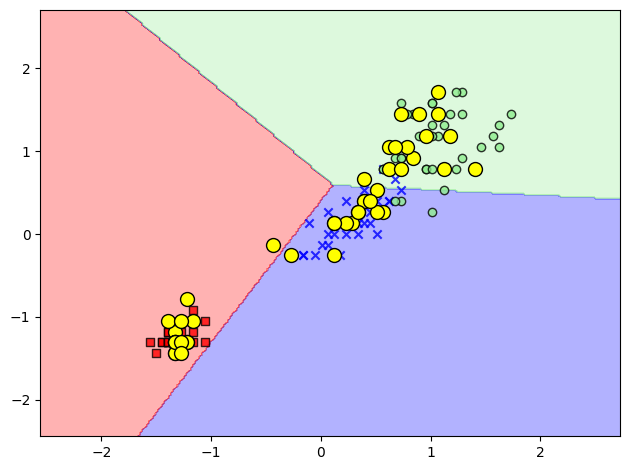

In [9]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X= X_combined_std, y= y_combined, 
                      classifier=ppn, test_idx=range(105, 150))
plt.tight_layout()

In [10]:
#если в пердыдущих примерах мы минимизировали функцию издержек
#то в логистической регрессии максимизируется функция правдоподобия
#домножаем ее на -1 и используем градиентный спуск

In [11]:
class LogisticRegressionGD(object):
    """Классификатор на основе логистической регрессии.
    Параметры
    eta : float
    Скорость обучения (между О . О и 1 . 0 )
    п iter : int
    Пр оходы по обучающему набору данных .
    random state : int
    Начальное значение генератора случайных чисел
    для инициализации случайными весами.
    Атрибуты
    w_ : одномерный массив
    Веса после подгонки .
    cost_ : список
    значение функции издержек на основе суммы квадратов
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Подгоняет к обучающим данным .
        Параметры
        Х : {подобен массиву} , форма = [n_examples , n_features]
        Обучающие векторы , где n_examples - количество образцов
        и n_features - количеств о признаков .
        у : подобен массиву , форма = [n_examples]
        Целевые значения .
        Возвращает
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])  # ско = 0.01
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.transpose().dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (-y.dot(np.log(output))-(1-y)*np.log(1 - output))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """вычисляем общий вход"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)
    
    def activation(self, z):
        """Функция вычисляет активацию, при необходимости заменить"""
        return(1.0 / (1.0 + np.exp(-np.clip(z, -250, 250))))
        #clip приравнивает в массиве z значения < -250 к -250, аналогично с больше



C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


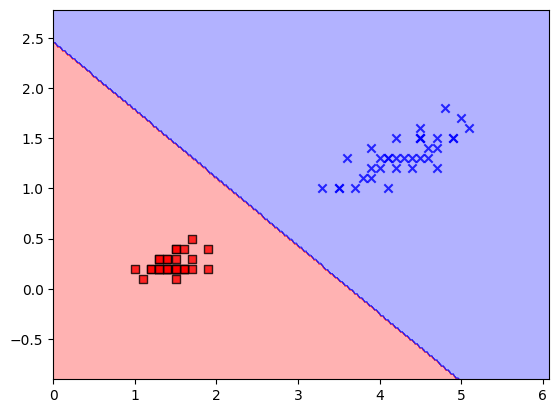

In [12]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]
lrgd = LogisticRegressionGD(eta = 0.05,
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset, y_train_01_subset)
plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


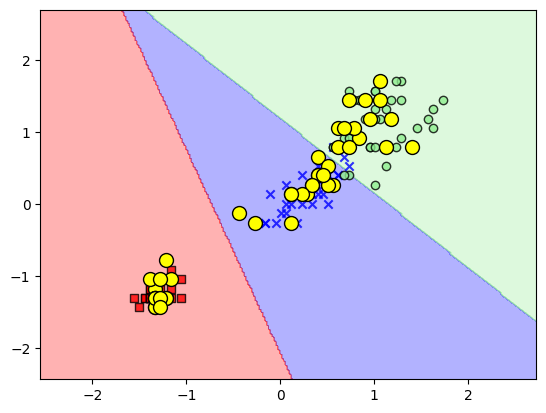

In [13]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1,
                        solver = 'lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr,
                      test_idx=range(105, 150))
#solver - флгоритм, который подгоняет веса
#c - уменьшаем => регуляризация увеличивается

[array([9.45923160e-05, 5.76506032e-05]), array([0.00094278, 0.0005734 ]), array([0.00912565, 0.00543828]), array([0.07064185, 0.03399467]), array([ 0.30947422, -0.03124033]), array([ 1.15687091, -0.81959988]), array([ 2.15931013, -1.82053519]), array([ 2.4099601 , -2.07349026]), array([ 2.43940519, -2.10326245]), array([ 2.4424029 , -2.10629411])]
[[ 9.45923160e-05  5.76506032e-05]
 [ 9.42782871e-04  5.73401558e-04]
 [ 9.12565212e-03  5.43828417e-03]
 [ 7.06418476e-02  3.39946744e-02]
 [ 3.09474221e-01 -3.12403273e-02]
 [ 1.15687091e+00 -8.19599881e-01]
 [ 2.15931013e+00 -1.82053519e+00]
 [ 2.40996010e+00 -2.07349026e+00]
 [ 2.43940519e+00 -2.10326245e+00]
 [ 2.44240290e+00 -2.10629411e+00]]


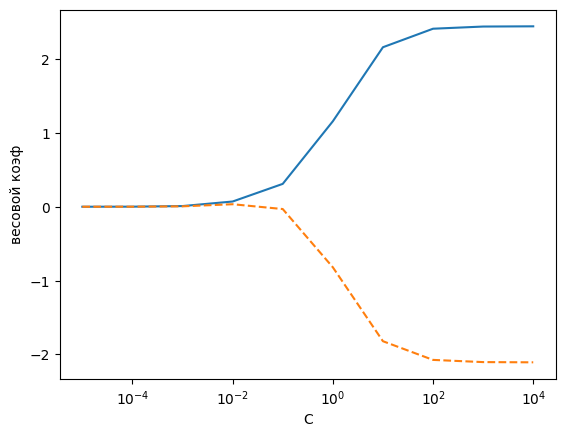

In [26]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.0**c, random_state=1,
                            solver='lbfgs', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.0**c)
print(weights)
weights = np.array(weights)
print(weights)
plt.plot(params, weights[:, 0],
         label = 'длинна лепестка')
plt.plot(params, weights[:, 1], linestyle = '--',
         label = 'ширина лепестка')
plt.ylabel('весовой коэф')
plt.xlabel('C')
plt.xscale('log')


In [27]:
lr.coef_

array([[-10.85522339,  -8.47746807],
       [  2.4424029 ,  -2.10629411],
       [ 14.65216005,   6.7948242 ]])

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


Text(0, 0.5, 'ширина лепестка [стандартизированная]')

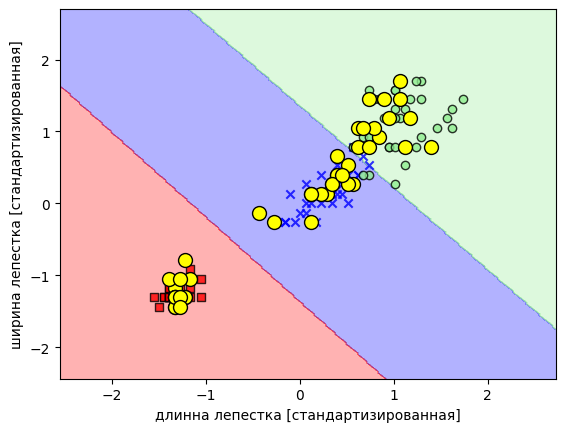

In [15]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('длинна лепестка [стандартизированная]')
plt.ylabel('ширина лепестка [стандартизированная]')


In [16]:
#забавный факт
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss = 'log')
svm = SGDClassifier(loss = 'hinge')

(-3.0, 3.0)

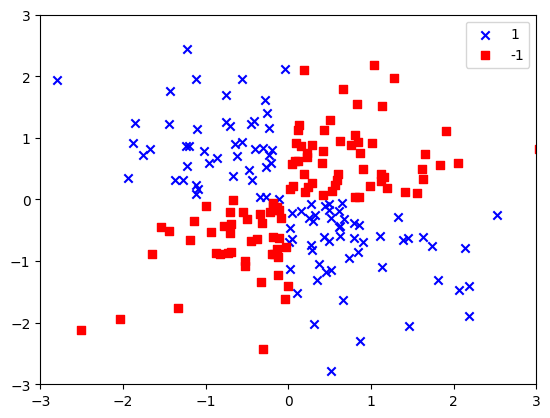

In [17]:
np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:,0] > 0,
                       X_xor[:,1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c = 'b', marker = 'x', label = '1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c = 'r', marker = 's', label = '-1')
plt.legend(loc = 'best')
plt.xlim([-3, 3])
plt.ylim([-3, 3])


C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


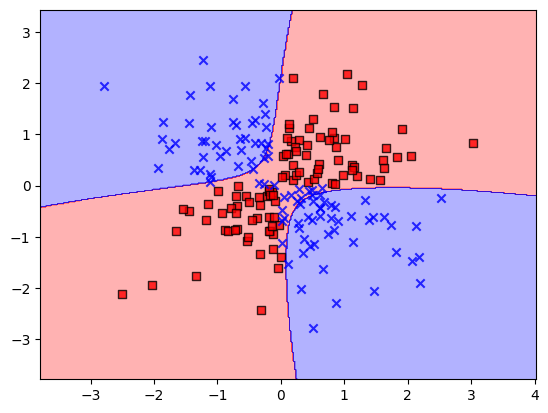

In [18]:
svm = SVC(kernel='rbf', random_state=1, gamma = 0.1, C = 10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


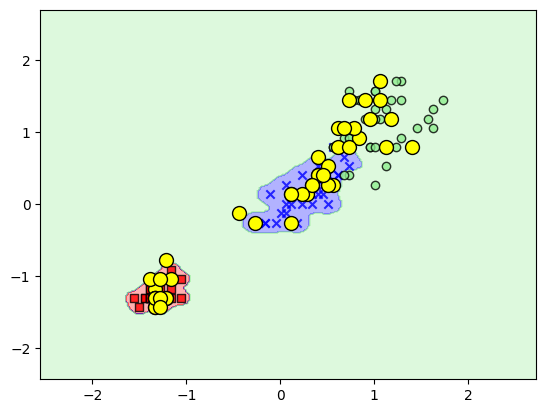

In [19]:
svm = SVC(kernel='rbf', random_state=1, gamma=100, C = 1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))

In [20]:
#энтропия в деревьях - стремится довести до максимума полное количество информации в дереве
#Джини - минимизирует вероятность неправильной классификации, обычно они похожи
#ошибка классификации - полезна для подрезки деревьев, но не для выращивания
#

In [21]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

C:\Users\VIKTOR\AppData\Local\Temp\ipykernel_9324\3709676866.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


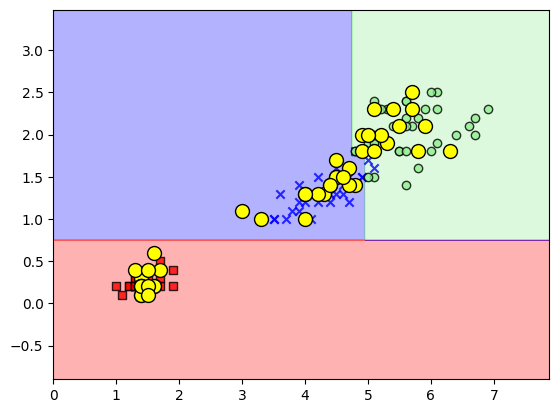

In [22]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
                      classifier=tree_model,
                      test_idx=range(105, 150))

[Text(0.25, 0.9, 'x[1] <= 0.75\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]'),
 Text(0.125, 0.7, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.375, 0.7, 'x[0] <= 4.75\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.5, 0.5, 'x[1] <= 1.75\ngini = 0.219\nsamples = 40\nvalue = [0, 5, 35]'),
 Text(0.25, 0.3, 'x[0] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.125, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.375, 0.1, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.75, 0.3, 'x[0] <= 4.85\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(0.625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]')]

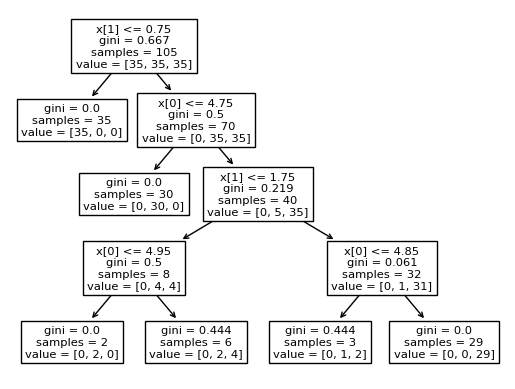

In [23]:
from sklearn import tree
tree.plot_tree(tree_model)

In [24]:
#у случайного лса помимо количества деревьев можно регулировать размер бутстреп выборки (количество наблюдений
#которое мы будем давать 1 дереву) с его помощью управляем компромиссом между смещением и дисперсией
